In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/11_Nov.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,20.000000,81.000000,1,4,1,1943.0,1963.0,2051.0,1852.0,1803.0,1981.0,1951.416667,1867.0
1,19.916667,81.000000,1,4,1,1889.0,1975.0,2036.0,1828.0,1781.0,1976.0,1933.750000,1824.0
2,19.833333,81.000000,1,4,1,1901.0,1990.0,2012.0,1764.0,1755.0,1935.0,1916.750000,1808.0
3,19.750000,81.000000,1,4,1,1887.0,1977.0,1977.0,1802.0,1760.0,1941.0,1902.416667,1805.0
4,19.666667,81.000000,2,4,1,1867.0,1943.0,1963.0,1788.0,1740.0,1913.0,1888.916667,1801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,13.432452,78.354324,23,7,0,1672.0,1762.0,1868.0,1657.0,1676.0,1644.0,1709.083333,1600.0
8636,13.432452,78.354324,24,7,0,1634.0,1746.0,1826.0,1630.0,1645.0,1619.0,1687.833333,1571.0
8637,13.432452,78.354324,24,7,0,1643.0,1722.0,1801.0,1613.0,1620.0,1603.0,1666.500000,1545.0
8638,13.100000,78.354324,24,7,0,1608.0,1699.0,1796.0,1598.0,1594.0,1583.0,1645.916667,1549.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700


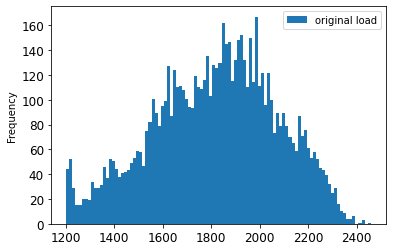

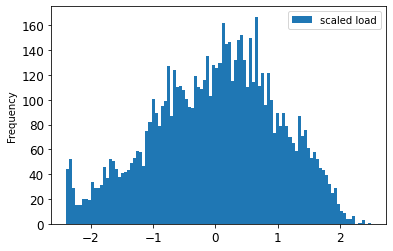

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

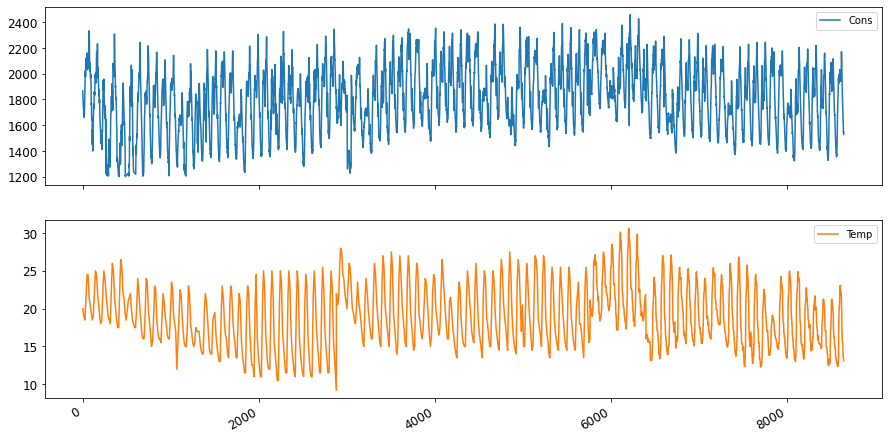

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020,-0.605322
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132,-0.620887
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957,-0.694818
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633,-0.601431
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700,-0.636451
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,-0.441585,0.205707,0.219186,-0.683145
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,-0.426361,0.152739,0.140516,-0.667580
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,-0.502479,0.073287,0.061508,-0.725947
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,-0.551955,0.039236,-0.011397,-1.080039
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,-0.601431,-0.021298,-0.071417,-1.430241


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,...,NaN,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,...,NaN,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,...,NaN,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,...,NaN,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,...,NaN,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,...,NaN,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,...,0.192358,0.025040,-0.037218,-0.048891,-0.064456,-0.185081,-0.231774,-0.286250,-0.348508,-0.410766


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7191,-0.080020,0.152030,0.619716,1.372462,0.976932,0.644431,0.288377,0.633230,1.059173,-0.122014,...,0.713769,0.635946,0.511430,0.363568,0.371350,0.289636,0.231270,-0.006089,0.017258,-0.080020
7192,-0.181190,0.152030,0.619716,1.516907,0.976932,0.644431,0.230023,0.508806,0.977577,-0.249181,...,0.635946,0.511430,0.363568,0.371350,0.289636,0.231270,-0.006089,0.017258,-0.080020,-0.181190
7193,-0.259012,0.152030,0.619716,1.516907,0.976932,0.644431,-0.007287,0.361053,0.798845,-0.303130,...,0.511430,0.363568,0.371350,0.289636,0.231270,-0.006089,0.017258,-0.080020,-0.181190,-0.259012
7194,-0.200645,0.145727,0.644504,1.516907,0.976932,0.644431,0.016055,0.368830,0.709479,-0.333958,...,0.363568,0.371350,0.289636,0.231270,-0.006089,0.017258,-0.080020,-0.181190,-0.259012,-0.200645
7195,-0.255121,0.139424,0.669291,1.516907,0.976932,0.644431,-0.081203,0.287177,0.631769,-0.414883,...,0.371350,0.289636,0.231270,-0.006089,0.017258,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121
7196,-0.332943,0.139424,0.669291,1.661353,0.976932,0.644431,-0.182351,0.228853,0.507434,-0.468832,...,0.289636,0.231270,-0.006089,0.017258,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121,-0.332943
7197,-0.457459,0.139424,0.669291,1.661353,0.976932,0.644431,-0.260157,-0.008330,0.359785,-0.542049,...,0.231270,-0.006089,0.017258,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121,-0.332943,-0.457459
7198,-0.438004,0.139424,0.669291,1.661353,0.976932,0.644431,-0.201802,0.015000,0.367556,-0.530489,...,-0.006089,0.017258,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121,-0.332943,-0.457459,-0.438004
7199,-0.574193,0.139424,0.687054,1.661353,0.976932,0.644431,-0.256267,-0.082206,0.285961,-0.692337,...,0.017258,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121,-0.332943,-0.457459,-0.438004,-0.574193
7200,-0.710383,0.139424,0.687054,-1.660891,1.485858,-1.551757,-0.334073,-0.183300,0.227679,-0.642241,...,-0.080020,-0.181190,-0.259012,-0.200645,-0.255121,-0.332943,-0.457459,-0.438004,-0.574193,-0.710383


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7091,0.336330,-0.077415,0.724885,1.228016,0.468006,0.644431,0.650176,0.948177,1.556515,0.348117,...,1.056188,0.951128,0.892761,0.748789,0.725442,0.651511,0.569797,0.429717,0.379132,0.336330
7092,0.258507,-0.077415,0.724885,1.372462,0.468006,0.644431,0.568480,0.889854,1.377782,0.282607,...,0.951128,0.892761,0.748789,0.725442,0.651511,0.569797,0.429717,0.379132,0.336330,0.258507
7093,0.098971,-0.077415,0.724885,1.372462,0.468006,0.644431,0.428429,0.745989,1.171852,0.174708,...,0.892761,0.748789,0.725442,0.651511,0.569797,0.429717,0.379132,0.336330,0.258507,0.098971
7094,0.040604,-0.131624,0.813574,1.372462,0.468006,0.644431,0.377854,0.722659,1.051402,0.174708,...,0.748789,0.725442,0.651511,0.569797,0.429717,0.379132,0.336330,0.258507,0.098971,0.040604
7095,-0.099476,-0.185834,0.902262,1.372462,0.468006,0.644431,0.335061,0.648783,0.946493,0.028274,...,0.725442,0.651511,0.569797,0.429717,0.379132,0.336330,0.258507,0.098971,0.040604,-0.099476
7096,-0.227883,-0.185834,0.902262,1.516907,0.468006,0.644431,0.257255,0.567130,0.888211,-0.106600,...,0.651511,0.569797,0.429717,0.379132,0.336330,0.258507,0.098971,0.040604,-0.099476,-0.227883
7097,-0.282359,-0.185834,0.902262,1.516907,0.468006,0.644431,0.097752,0.427153,0.744448,-0.098893,...,0.569797,0.429717,0.379132,0.336330,0.258507,0.098971,0.040604,-0.099476,-0.227883,-0.282359
7098,-0.313488,-0.282907,1.008123,1.516907,0.468006,0.644431,0.039397,0.376606,0.721135,-0.137428,...,0.429717,0.379132,0.336330,0.258507,0.098971,0.040604,-0.099476,-0.227883,-0.282359,-0.313488
7099,-0.395201,-0.379979,1.113984,1.516907,0.468006,0.644431,-0.100654,0.333835,0.647311,-0.202938,...,0.379132,0.336330,0.258507,0.098971,0.040604,-0.099476,-0.227883,-0.282359,-0.313488,-0.395201
7100,-0.449677,-0.379979,1.113984,1.661353,0.468006,0.644431,-0.229034,0.256071,0.565716,-0.260741,...,0.336330,0.258507,0.098971,0.040604,-0.099476,-0.227883,-0.282359,-0.313488,-0.395201,-0.449677


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.134515
11,-0.963306
12,-1.266813
13,-1.624797
14,-1.613123
...,...
7096,-0.332943
7097,-0.457459
7098,-0.438004
7099,-0.574193


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-0.414657,-0.033488,0.786924,-1.372000,-0.040920,0.644431,-0.232925,-0.039436,0.320930,-0.411029,-0.593819,-0.040216,-0.135845
11,-0.441895,-0.054500,0.786924,-1.372000,-0.040920,0.644431,-0.287389,-0.051100,0.266533,-0.438004,-0.666131,-0.021298,-0.197899
12,-0.461351,-0.075511,0.786924,-1.227555,-0.040920,0.644431,-0.349634,-0.066653,0.188824,-0.507367,-0.631878,-0.089400,-0.254866
13,-0.500262,-0.086017,0.806475,-1.227555,-0.040920,0.644431,-0.411879,-0.187189,0.021748,-0.545903,-0.628072,-0.078050,-0.300644
14,-0.492480,-0.096523,0.826025,-1.227555,-0.040920,0.644431,-0.415770,-0.233848,-0.040420,-0.561317,-0.727025,-0.134801,-0.340318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,-0.227883,-0.185834,0.902262,1.516907,0.468006,0.644431,0.257255,0.567130,0.888211,-0.106600,-0.144727,-0.119667,0.339225
7097,-0.282359,-0.185834,0.902262,1.516907,0.468006,0.644431,0.097752,0.427153,0.744448,-0.098893,-0.175174,-0.115884,0.249365
7098,-0.313488,-0.282907,1.008123,1.516907,0.468006,0.644431,0.039397,0.376606,0.721135,-0.137428,-0.209427,-0.123451,0.158827
7099,-0.395201,-0.379979,1.113984,1.516907,0.468006,0.644431,-0.100654,0.333835,0.647311,-0.202938,-0.255097,-0.202903,0.067611


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1615.0,19.852451,79.297240,1.0,7.0,0.0,1700.0,1751.0,1816.0,1620.0,1621.0,1638.0,1726.333333
7202,1585.0,19.497450,80.796815,1.0,7.0,0.0,1705.0,1766.0,1822.0,1604.0,1619.0,1637.0,1706.583333
7203,1567.0,19.142450,82.296390,1.0,7.0,0.0,1670.0,1752.0,1797.0,1591.0,1619.0,1599.0,1687.416667
7204,1566.0,19.142450,82.296390,2.0,7.0,0.0,1635.0,1732.0,1771.0,1563.0,1610.0,1599.0,1670.333333
7205,1546.0,19.142450,82.296390,2.0,7.0,0.0,1615.0,1700.0,1751.0,1552.0,1593.0,1578.0,1653.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,1617.0,15.592452,78.786610,24.0,2.0,1.0,1702.0,1789.0,1864.0,1514.0,1630.0,1617.0,1725.416667
8158,1586.0,15.352452,78.786610,24.0,2.0,1.0,1688.0,1744.0,1845.0,1504.0,1623.0,1605.0,1703.833333
8159,1572.0,15.352452,81.444100,24.0,2.0,1.0,1662.0,1704.0,1822.0,1485.0,1612.0,1597.0,1683.000000
8160,1543.0,15.352452,81.444100,1.0,3.0,1.0,1639.0,1687.0,1806.0,1439.0,1591.0,1570.0,1661.083333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978


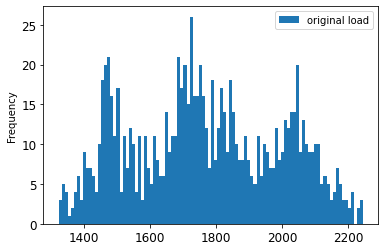

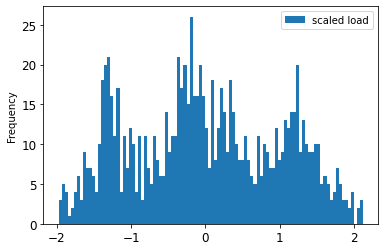

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499,-0.979125
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351,-1.126049
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460,-1.085979
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775,-1.148311
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090,-1.166120
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736,-1.170572
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990,-1.192833
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910,-1.272973
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978,-1.277426


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,...,NaN,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,...,NaN,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,...,NaN,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,...,NaN,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,...,NaN,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,...,-0.680825,-0.814392,-0.894533,-0.898985,-0.988030,-1.175024,-1.232903,-1.255164,-1.308591,-1.326400


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8052,-0.569519,-0.070279,0.212333,1.372873,-1.256834,-1.22847,-0.296148,0.103377,0.489862,0.024248,...,0.316478,0.107222,-0.004084,-0.182174,-0.213339,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519
8053,-0.676373,-0.070279,0.212333,1.372873,-1.256834,-1.22847,-0.434374,-0.008159,0.414009,-0.090401,...,0.107222,-0.004084,-0.182174,-0.213339,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373
8054,-0.765418,-0.252185,0.462371,1.372873,-1.256834,-1.22847,-0.425456,-0.186617,0.405085,-0.178592,...,-0.004084,-0.182174,-0.213339,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418
8055,-0.876724,-0.434091,0.712409,1.372873,-1.256834,-1.22847,-0.492339,-0.217847,0.311385,-0.262374,...,-0.182174,-0.213339,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724
8056,-0.992482,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.572599,-0.298153,0.101675,-0.363794,...,-0.213339,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482
8057,-1.041457,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.679612,-0.436458,-0.009873,-0.584272,...,-0.293480,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482,-1.041457
8058,-0.992482,-0.501318,0.771187,1.517204,-1.256834,-1.22847,-0.768789,-0.427535,-0.188350,-0.438756,...,-0.431499,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482,-1.041457,-0.992482
8059,-1.032552,-0.568544,0.829964,1.517204,-1.256834,-1.22847,-0.880261,-0.494457,-0.219584,-0.438756,...,-0.422595,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482,-1.041457,-0.992482,-1.032552
8060,-1.050361,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-0.996191,-0.574763,-0.299898,-0.553405,...,-0.489378,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482,-1.041457,-0.992482,-1.032552,-1.050361
8061,-1.130502,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-1.045239,-0.681837,-0.438218,-0.676872,...,-0.569519,-0.676373,-0.765418,-0.876724,-0.992482,-1.041457,-0.992482,-1.032552,-1.050361,-1.130502


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,-1.286330
7212,-1.317496
7213,-1.353114
7214,-1.308591
7215,-1.259617
...,...
8057,-0.671920
8058,-0.809940
8059,-0.872271
8060,-1.001386


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7211,-1.272973,0.043082,1.102682,-1.369419,1.441195,-1.22847,-1.236971,-0.900448,-0.442680,-1.280983,-1.213846,-1.220868,-1.097632
7212,-1.246260,0.043082,1.102682,-1.225087,1.441195,-1.22847,-1.259265,-0.904910,-0.598847,-1.280983,-1.253648,-1.238697,-1.155224
7213,-1.299687,0.043082,1.102682,-1.225087,1.441195,-1.22847,-1.312771,-0.994139,-0.688085,-1.316259,-1.231536,-1.260983,-1.209681
7214,-1.290782,0.000901,1.120850,-1.225087,1.441195,-1.22847,-1.330607,-1.181519,-0.821943,-1.333897,-1.306717,-1.336755,-1.251601
7215,-1.313044,-0.041280,1.139018,-1.225087,1.441195,-1.22847,-1.277100,-1.239518,-0.902257,-1.311849,-1.289027,-1.376870,-1.288429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-1.041457,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.679612,-0.436458,-0.009873,-0.584272,-0.665465,-0.338340,-0.614960
8058,-0.992482,-0.501318,0.771187,1.517204,-1.256834,-1.22847,-0.768789,-0.427535,-0.188350,-0.438756,-0.603551,-0.324968,-0.686264
8059,-1.032552,-0.568544,0.829964,1.517204,-1.256834,-1.22847,-0.880261,-0.494457,-0.219584,-0.438756,-0.683155,-0.382912,-0.758352
8060,-1.050361,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-0.996191,-0.574763,-0.299898,-0.553405,-0.731801,-0.485428,-0.824954


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 1s 91ms/step - loss: 0.8339 - val_loss: 0.8092
Epoch 2/300
15/15 [==============================] - 1s 39ms/step - loss: 0.8337 - val_loss: 0.8065
Epoch 3/300
15/15 [==============================] - 1s 37ms/step - loss: 0.8296 - val_loss: 0.8038
Epoch 4/300
15/15 [==============================] - 1s 39ms/step - loss: 0.8269 - val_loss: 0.8012
Epoch 5/300
15/15 [==============================] - 1s 39ms/step - loss: 0.8247 - val_loss: 0.7985
Epoch 6/300
15/15 [==============================] - 1s 38ms/step - loss: 0.8202 - val_loss: 0.7958
Epoch 7/300
15/15 [==============================] - 1s 36ms/step - loss: 0.8208 - val_loss: 0.7932
Epoch 8/300
15/15 [==============================] - 1s 40ms/step - loss: 0.8165 - val_loss: 0.7907
Epoch 9/300
15/15 [==============================] - 1s 37ms/step - loss: 0.8124 - val_loss: 0.7881
Epoch 10/300
15/15 [==============================] - 1s 45ms/step - loss: 0.8115 - val_loss: 0.7856

15/15 [==============================] - 1s 46ms/step - loss: 0.6376 - val_loss: 0.6031
Epoch 156/300
15/15 [==============================] - 1s 46ms/step - loss: 0.6370 - val_loss: 0.6029
Epoch 157/300
15/15 [==============================] - 1s 47ms/step - loss: 0.6363 - val_loss: 0.6026
Epoch 158/300
15/15 [==============================] - 1s 35ms/step - loss: 0.6361 - val_loss: 0.6024
Epoch 159/300
15/15 [==============================] - 1s 34ms/step - loss: 0.6366 - val_loss: 0.6021
Epoch 160/300
15/15 [==============================] - 1s 35ms/step - loss: 0.6365 - val_loss: 0.6019
Epoch 161/300
15/15 [==============================] - 1s 38ms/step - loss: 0.6366 - val_loss: 0.6017
Epoch 162/300
15/15 [==============================] - 1s 35ms/step - loss: 0.6357 - val_loss: 0.6015
Epoch 163/300
15/15 [==============================] - 1s 36ms/step - loss: 0.6371 - val_loss: 0.6013
Epoch 164/300
15/15 [==============================] - 1s 40ms/step - loss: 0.6365 - val_loss: 0

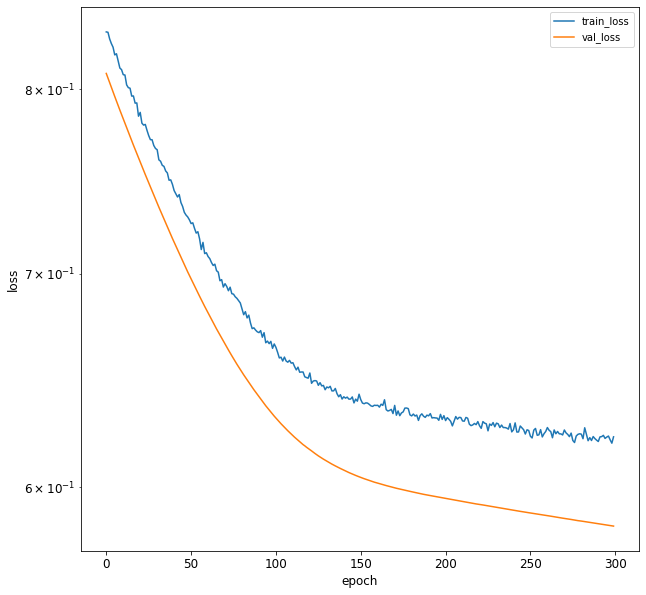

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1517.0,15.227452,82.212390,1.0,3.0,1.0,1586.0,1688.0,1744.0,1404.0,1541.0,1520.0,1620.416667
8163,1505.0,15.102452,82.980680,1.0,3.0,1.0,1572.0,1662.0,1704.0,1403.0,1525.0,1501.0,1603.833333
8164,1490.0,15.102452,82.980680,2.0,3.0,1.0,1543.0,1639.0,1687.0,1347.0,1522.0,1500.0,1587.416667
8165,1462.0,15.102452,82.980680,2.0,3.0,1.0,1528.0,1617.0,1702.0,1370.0,1497.0,1482.0,1567.416667
8166,1458.0,15.172452,83.207925,2.0,3.0,1.0,1517.0,1586.0,1688.0,1361.0,1478.0,1473.0,1548.250000
8167,1455.0,15.242452,83.435170,2.0,3.0,1.0,1505.0,1572.0,1662.0,1356.0,1474.0,1459.0,1531.000000
8168,1455.0,15.242452,83.435170,3.0,3.0,1.0,1490.0,1543.0,1639.0,1343.0,1467.0,1450.0,1515.666667
8169,1441.0,15.242452,83.435170,3.0,3.0,1.0,1462.0,1528.0,1617.0,1340.0,1446.0,1418.0,1501.000000
8170,1442.0,14.857452,86.310845,3.0,3.0,1.0,1458.0,1517.0,1586.0,1335.0,1420.0,1428.0,1489.000000
8171,1429.0,14.472452,89.186520,3.0,3.0,1.0,1455.0,1505.0,1572.0,1331.0,1422.0,1419.0,1477.083333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


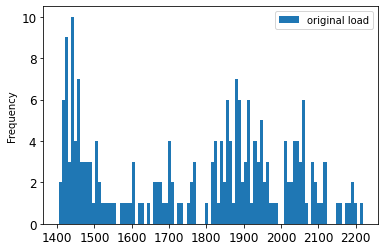

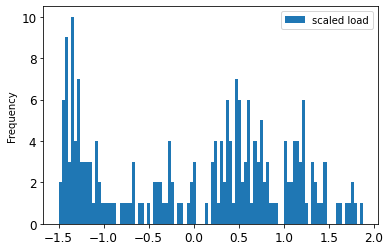

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,-0.581660,-0.721890,-0.663175,-1.259047
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,-0.660779,-0.805196,-0.736720,-1.263190
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,-0.675614,-0.809581,-0.809527,-1.308762
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,-0.799237,-0.888503,-0.898226,-1.329476
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,-0.893191,-0.927964,-0.983228,-1.337762
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,-0.912971,-0.989347,-1.059731,-1.325333
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,-0.947585,-1.028808,-1.127733,-1.354333
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,-1.051429,-1.169114,-1.192779,-1.420620
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,-1.179997,-1.125268,-1.245998,-1.354333
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,-1.170107,-1.164729,-1.298847,-1.416477


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,...,NaN,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,...,NaN,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,...,NaN,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,...,NaN,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,...,NaN,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,...,-1.031188,-1.080903,-1.143046,-1.259047,-1.275619,-1.288047,-1.288047,-1.346048,-1.341905,-1.395762


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8269,-1.420620,-1.155019,1.285274,-1.076327,0.516823,0.340279,-1.348415,-1.265368,-1.094271,-1.264268,...,-1.143046,-1.205189,-1.259047,-1.263190,-1.308762,-1.329476,-1.337762,-1.325333,-1.354333,-1.420620
8270,-1.354333,-1.138049,1.283239,-1.076327,0.516823,0.340279,-1.356771,-1.320709,-1.168182,-1.252123,...,-1.205189,-1.259047,-1.263190,-1.308762,-1.329476,-1.337762,-1.325333,-1.354333,-1.420620,-1.354333
8271,-1.416477,-1.121080,1.281204,-1.076327,0.516823,0.340279,-1.344238,-1.324966,-1.189920,-1.268316,...,-1.259047,-1.263190,-1.308762,-1.329476,-1.337762,-1.325333,-1.354333,-1.420620,-1.354333,-1.416477
8272,-1.404048,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.373482,-1.371792,-1.250788,-1.292606,...,-1.263190,-1.308762,-1.329476,-1.337762,-1.325333,-1.354333,-1.420620,-1.354333,-1.416477,-1.404048
8273,-1.408191,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.440325,-1.393077,-1.316004,-1.320944,...,-1.308762,-1.329476,-1.337762,-1.325333,-1.354333,-1.420620,-1.354333,-1.416477,-1.404048,-1.408191


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.404048
8173,-1.408191
8174,-1.337762
8175,-1.296333
8176,-1.172046
...,...
8269,-1.424763
8270,-1.441334
8271,-1.300476
8272,-1.230047


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8172,-1.416477,-1.128622,0.743671,-1.076327,-1.004934,0.340279,-1.306638,-1.201513,-1.020359,-1.592179,-1.189887,-1.177883,-1.342827
8173,-1.404048,-1.128622,0.743671,-1.076327,-1.004934,0.340279,-1.365126,-1.320709,-1.085575,-1.624565,-1.209667,-1.177883,-1.380154
8174,-1.391619,-1.132393,0.767037,-1.076327,-1.004934,0.340279,-1.360948,-1.337737,-1.133400,-1.628613,-1.254171,-1.204190,-1.412307
8175,-1.408191,-1.136164,0.790404,-1.076327,-1.004934,0.340279,-1.415259,-1.350508,-1.185573,-1.681241,-1.288786,-1.243651,-1.441504
8176,-1.433048,-1.136164,0.790404,-0.935648,-1.004934,0.340279,-1.436147,-1.350508,-1.250788,-1.681241,-1.254171,-1.326958,-1.467374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.420620,-1.155019,1.285274,-1.076327,0.516823,0.340279,-1.348415,-1.265368,-1.094271,-1.264268,-1.585482,-1.186652,-1.364632
8270,-1.354333,-1.138049,1.283239,-1.076327,0.516823,0.340279,-1.356771,-1.320709,-1.168182,-1.252123,-1.590427,-1.226113,-1.390502
8271,-1.416477,-1.121080,1.281204,-1.076327,0.516823,0.340279,-1.344238,-1.324966,-1.189920,-1.268316,-1.654711,-1.256805,-1.420068
8272,-1.404048,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.373482,-1.371792,-1.250788,-1.292606,-1.654711,-1.226113,-1.443352


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.8570489883422852s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1765.90566
dtype: float64
Cons    241.948842
dtype: float64


In [46]:
load_mean=1765.90566
load_std=241.948842
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


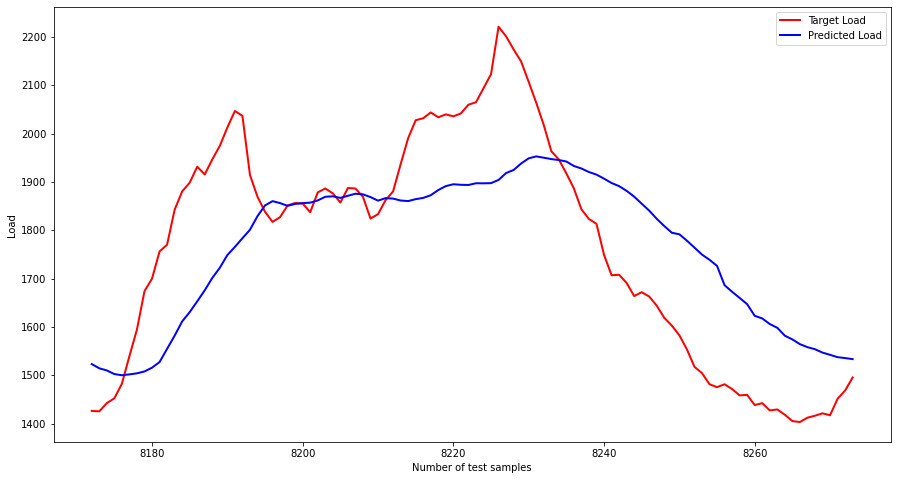

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

7.975565511935407


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -0.793582
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  142512.995149
8173  142413.295909
8174  144118.880797
8175  145122.487611
8176  148131.852322
...             ...
8269  142009.765834
8270  141608.834541
8271  145019.770326
8272  146725.154398
8273  149433.578578

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8172   9378.786867
8173   7941.732982
8174   4578.622603
8175   2512.871096
8176    309.932610
...            ...
8269  15770.236972
8270  15626.577019
8271   7412.142951
8272   4506.434550
8273   1440.739035

[102 rows x 1 columns]
y_t+100    26807.28644
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    163.729308
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1523.042]
[1514.3119]
[1509.9012]
[1502.388]
[1499.9353]
[1501.7137]
[1503.9265]
[1507.7854]
[1515.6085]
[1527.1938]
[1554.5955]
[1581.7526]
[1611.2365]
[1630.531]
[1652.754]
[1675.7098]
[1701.2365]
[1722.2858]
[1748.6033]
[1765.4377]
[1783.3696]
[1800.908]
[1829.0854]
[1851.3542]
[1860.1619]
[1856.0387]
[1850.4857]
[1854.3969]
[1856.0471]
[1857.0223]
[1861.6482]
[1869.1882]
[1870.1307]
[1866.839]
[1871.2114]
[1875.4537]
[1874.2017]
[1868.5659]
[1861.1768]
[1866.371]
[1865.4178]
[1861.4258]
[1860.2805]
[1864.2643]
[1866.8478]
[1872.4215]
[1883.1323]
[1891.2838]
[1895.1018]
[1893.9639]
[1893.6096]
[1897.1365]
[1897.0374]
[1897.3741]
[1904.0632]
[1918.3025]
[1924.6262]
[1938.1344]
[1948.7119]
[1952.7552]
[1949.9974]
[1947.1976]
[1945.1398]
[1942.156]
[1932.8328]
[1927.6747]
[1920.3254]
[1915.0244]
[1906.6682]
[1897.6737]
[1891.1824]
[1881.4127]
[1869.4496]
[1854.8591]
[1840.437]
[1823.5485]
[1808.5596]
[1794.783]
[1791.5543]
[1778.413]
[1764.0383]
[1749.5635]
[1738.8071]
[1726.1486]
[16